In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
from random import*
from scipy.stats import entropy
from Bio import SeqIO

# Problem 1, question a)

In [2]:
records = list(SeqIO.parse("MALGMALK1.fasta", "fasta"))

In [3]:
raw_seqs=[] #array of strings
for i in range(len(records)): #loop over rows
    raw_seqs.append(str(records[i].seq))

In [4]:
dictionary=dict([('A',0), ('C', 1), ('D', 2), ('E', 3),('F',4),('G',5),('H',6),('I',7),('K',8),('L',9),('M',10),('N',11),('P',12),('Q',13),('R',14),('S',15),('T',16),('V',17),('W',18),('Y',19),('-',20)])

In [5]:
seqarray=np.zeros((len(raw_seqs),len(raw_seqs[0])))
for seqid in range(len(raw_seqs)):
    seqarray[seqid]=[dictionary[character] for character in raw_seqs[seqid]]

In [6]:
seqarray=seqarray.astype(np.int8) #we want integers

In [7]:
seqarray[1,:]

array([ 0, 14,  2,  3, 10, 12,  4, 14, 14,  4,  7, 16,  0,  9,  9,  9, 15,
       12, 10,  7, 17, 12,  9,  7,  7, 16,  0,  0,  5, 10,  4,  4,  4, 19,
       20, 20, 20, 20, 15, 11,  9, 20,  5,  9,  0,  5,  5, 19,  9,  5, 17,
        7,  9,  0,  6,  0,  0,  9,  5, 16, 12,  4, 17,  7,  7, 16, 17, 16,
        0, 16,  9, 16,  5,  4,  2, 19, 15,  9,  0, 14,  0,  0,  9, 11,  9,
        5,  0, 16, 12,  7, 14, 17,  4,  4,  2, 17,  7, 10, 12,  9,  7, 14,
       12,  5, 17,  7, 15,  5,  0,  9,  4,  0,  4,  7, 16, 15,  4,  2,  3,
       17, 17, 17,  7,  9,  4, 10,  0,  5, 12, 20, 20, 13, 13, 14, 16,  7,
       12, 14, 13, 10,  4, 15,  5,  9, 14,  3, 13,  7, 20, 20, 11, 12, 15,
        7,  9,  0,  7,  0, 16,  9,  9,  7,  9, 17, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 16,  2,  7, 11,  7,  3,  7,  5, 13,  5,
       13,  4,  7, 16,  9,  9,  5, 12, 15,  5,  1,  5,  8, 15, 16,  9,  9,
       14,  1,  7,  0,  5,  9, 16,  3, 17,  2,  5,  5, 13,  7,  9,  9,  2,
        5,  3,  2,  9, 17

# Problem 1, question b)

In [8]:
frequencies=np.zeros((len(seqarray[0]),np.max(seqarray)+1))
for i in range(len(seqarray[0])): #loop over columns
    hist, bin_edges = np.histogram(seqarray[:,i], bins=range(22))
    frequencies[i,:]=hist/len(seqarray)

In [9]:
#checking: no frequency should be larger than one
np.max(frequencies) 

0.9996003197442046

In [10]:
#checking: frequencies should sum to one
sums=np.zeros(len(seqarray[0]))
for i in range(len(seqarray[0])): #loop over columns
    sums[i]=np.sum(frequencies[i,:])
sums

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [11]:
entropies=np.zeros(len(seqarray[0]))
for i in range(len(seqarray[0])): #loop over columns
    entropies[i]=entropy(frequencies[i,:], base=2)

In [12]:
len(seqarray[0])

319

In [13]:
np.mean(entropies[1:177])

2.9478020797255002

In [14]:
np.mean(entropies[178:319])

1.689178570769012

The mean value of entropy over the MALG sites is substantially larger than that over the MALK sites. It means that MALK is overall more highly conserved than MALG. 

# Problem 1, question c)

In [15]:
entropiesMALG=np.zeros(177)
entropiesMALK=np.zeros(142)
Hxy=np.zeros((177,142))
for i in range(177): #loop over columns in MALG
    hist= np.histogram(seqarray[:,i], bins=range(22))[0]
    entropiesMALG[i]=entropy(hist/len(seqarray), base=2)
    for j in range(177,len(seqarray[0])): #loop over columns in MALK
        hist= np.histogram(seqarray[:,j], bins=range(22))[0]
        entropiesMALK[j-177]=entropy(hist/len(seqarray), base=2)
        hist = np.histogram2d(seqarray[:,i], seqarray[:,j], bins=[range(22),range(22)])[0]
        aux = hist/len(seqarray)
        Hxy[i,j-177]=entropy(aux.flatten(), base=2)

In [16]:
Ixy=np.zeros((177,142))
for i in range(177): #loop over columns in MALG
    for j in range(177,len(seqarray[0])): #loop over columns in MALK
        Ixy[i,j-177]=entropiesMALG[i]+entropiesMALK[j-177]-Hxy[i,j-177]# Ixy=Hx+Hy-Hxy

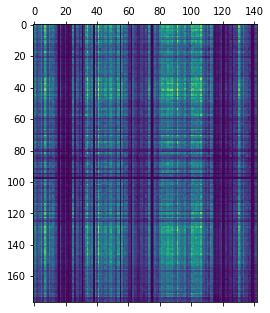

In [17]:
plt.matshow(Ixy)
plt.show()

We observe that some rows and columns are globally lighter than others, rather than specific pairs of sites. It shows that some specific sites are involved in many pairs with larger mutual information. 

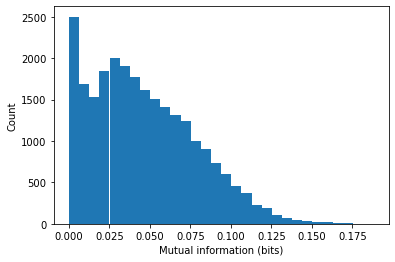

In [18]:
plt.hist(Ixy.flatten(),30)
ax = plt.gca()
ax.set_xlabel("Mutual information (bits)")
ax.set_ylabel("Count")
plt.show()

# Problem 1, question d)

In [19]:
records = list(SeqIO.parse("MALGMALK2.fasta", "fasta"))

In [20]:
raw_seqs=[] #array of strings
for i in range(len(records)): #loop over rows
    raw_seqs.append(str(records[i].seq))

In [21]:
seqarray2=np.zeros((len(raw_seqs),len(raw_seqs[0])))
for seqid in range(len(raw_seqs)):
    seqarray2[seqid]=[dictionary[character] for character in raw_seqs[seqid]]

In [22]:
seqarray2=seqarray2.astype(np.int8) #we want integers

In [23]:
entropiesMALG2=np.zeros(177)
entropiesMALK2=np.zeros(142)
Hxy2=np.zeros((177,142))
for i in range(177): #loop over columns in MALG
    hist= np.histogram(seqarray2[:,i], bins=range(22))[0]
    entropiesMALG2[i]=entropy(hist/len(seqarray2), base=2)
    for j in range(177,len(seqarray2[0])): #loop over columns in MALK
        hist= np.histogram(seqarray2[:,j], bins=range(22))[0]
        entropiesMALK2[j-177]=entropy(hist/len(seqarray2), base=2)
        hist = np.histogram2d(seqarray2[:,i], seqarray2[:,j], bins=[range(22),range(22)])[0]
        aux = hist/len(seqarray2)
        Hxy2[i,j-177]=entropy(aux.flatten(), base=2)

In [24]:
Ixy2=np.zeros((177,142))
for i in range(177): #loop over columns in MALG
    for j in range(177,len(seqarray[0])): #loop over columns in MALK
        Ixy2[i,j-177]=entropiesMALG2[i]+entropiesMALK2[j-177]-Hxy2[i,j-177]# Ixy=Hx+Hy-Hxy

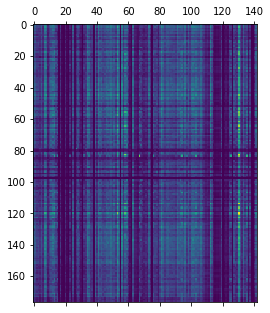

In [25]:
plt.matshow(Ixy2);
plt.show()

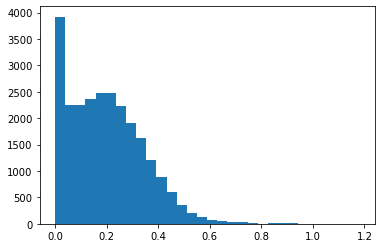

In [26]:
plt.hist(Ixy2.flatten(),30)
plt.show()

# Problem 1, question e)

In [28]:
np.mean(Ixy)

0.04606188406015028

In [29]:
np.mean(Ixy2)

0.19845612975593485

We again observe that some rows and columns are globally lighter than others. However, here, we also observe that specific pairs of sites have a high mutual information, which was not obvious in the previous dataset. Besides, overall, the mutual information values are far larger here than in the previous dataset, as illustrated by the means computed just above.

We expect interacting partners to coevolve to maintain their specific interactions through the course of evolution. This leads to larger statistical dependence and larger mutual information values between the sites of interacting partner sequences. Therefore, the file where we found larger mutual information values should be the one with the correct interacting partners: it is file number 2. Meanwhile, file number 1 contains scrambled partners, with much reduced mutual information.

# Problem 1, question f)

We know that finite size effects on entropy have a leading term in K/N, where K is the number of possible states and N is the number of data points. Here, we have K=21 and N=5004, so it is of the order 0.004, to be compared to a maximum entropy of log_2(21)=4.39. Thus, the finite size effects on entropy are very small.

For mutual information, we should also consider the finite size effects on joint entropy H(X,Y). In this case, there are K^2=21^2 possible states, but still N=5004. Thus, finite size effects are of the order of 0.09, which is still small but less small than for entropy. For mutual information, the finite size effects on joint entropy dominate over those on the entropy of each separate site. 

Interestingly, we observe that the mutual information values from file 1 were of the order of 0.09, as the mean was around 0.05 and very few pairs of sites were above 0.09. Thus, in file 1, most of the mutual information signal we computed could come from finite size effects. Meanwhile, for file 2, the values were much above 0.09 and thus, there is real mutual information signal that does not only come from finite size effects.

In [31]:
np.size(raw_seqs)

5004

In [32]:
21/5004

0.004196642685851319

In [33]:
np.log(21)/np.log(2)

4.392317422778761

In [34]:
21*21/5004

0.08812949640287769

# Problem 1, question g)

Uniprot says that MALG is "part of the ABC transporter complex MalEFGK involved in maltose/maltodextrin import. Probably responsible for the translocation of the substrate across the membrane.", and that MALK is "Part of the ABC transporter complex MalEFGK involved in maltose/maltodextrin import. Responsible for energy coupling to the transport system." ABC transporters are protein complexes that ensure transport of substances across the cell membrane. Here we are focusing on the one that is involved in maltose/maltodextrin import. There are other ABC transporters, which transport other substances. 

The interaction between MALG and MALK is part of the interactions that maintain the integrity of the ABC transporter protein complex. Thus, the interaction between MALG and MALK is expected to be quite specific, to ensure the assembly and maintainance of this important protein complex.

We expect the pairs of sites with high mutual information to be located at the binding interface between MALG and MALK.

This is very similar to the HK-RR case, as the specificity of interaction yields pairs of sites with large mutual information between the interaction partners, which tend to be at the interface. However, here, we are considering a permanent complex as opposed to a transient interaction involved in signaling.

# Problem 1, question h)

We have seen that what distinguishes the correct pairings from the incorrect ones was that the correct pairings had higher mutual information values in some pairs of sites. Thus, if we start from a file with scrambled partners, we can try to modify the pairings in order to obtain higher mutual information values. In principle the correct pairing is the one that leads to the largest mutual information values. We have to solve an optimization problem over pairings.

# Problem 2, question a)

Assuming L independent sites, the likelihood of the data if the sequences are separated by an evolutionary distance d is the probability that n sites feature a different amino acid while L-n sites feature the same one after a distance d. It is given by the binomial distribution: $\mathcal{L}=P(n)={L\choose n}[3p(d)]^n[1-3p(d)]^{L-n}$, where 3p(d) is the probability that the nucleotide differs from its ancestral state after an evolutionary distance d.

# Problem 2, question b)

To find a maximum likelihood estimate of the evolutionary distance d, we need to find the value of d that maximizes the likelihood $\mathcal{L}$ of the data, or equivalnently, its logarithm. Thus, we need to differentiate $\ln[\mathcal{L}]$ with respect to d, for fixed values of L and n (L and n characterize the data, which is fixed). 

Let us introduce $a=e^{-4d/3}$. We have:
\begin{equation}
\frac{\partial [\ln(\mathcal{L})]}{\partial d}=n\frac{\partial \ln[p(d)]}{\partial d}+(L-n)\frac{\partial \ln[1-3p(d)]}{\partial d}=n\frac{\partial \ln[1-a]}{\partial d}+(L-n)\frac{\partial \ln[3a+1]}{\partial d}=\frac{\partial a}{\partial d}\left[-\frac{n}{1-a}+3\frac{L-n}{3a+1}\right]=\frac{4a}{3}\left[\frac{n}{1-a}-3\frac{L-n}{3a+1}\right]=\frac{4a}{3}\times\frac{n(1+3a)-3(L-n)(1-a)}{(1-a)(1+3a)}=\frac{4a}{3}\times\frac{4n+3L(a-1)}{(1-a)(1+3a)}\,.
\end{equation}
Thus, setting to zero the partial derivative of $\ln(\mathcal{L})$ with respect to $d$ yields $4n+3L(a-1)$, or $a=1-4n/(3L)$, which gives $d=-\frac{3}{4}\ln\left[1-\frac{4}{3}\frac{n}{L}\right]$.

# Problem 2, question c)

In [35]:
records = list(SeqIO.parse("BetaLactamase.fasta", "fasta"))

In [36]:
raw_seqs3=[] #array of strings
for i in range(len(records)): #loop over rows
    raw_seqs3.append(str(records[i].seq))

In [37]:
len(raw_seqs3[0])

309

In [38]:
dictionary2=dict([('A',0), ('C', 1), ('G', 2), ('T', 3)])

In [39]:
seqarray3=np.zeros((len(raw_seqs3),len(raw_seqs3[0])))
for seqid in range(len(raw_seqs3)):
    seqarray3[seqid]=[dictionary2[character] for character in raw_seqs3[seqid]]

In [40]:
seqarray3=seqarray3.astype(np.int8) #we want integers

In [41]:
h01=sum(i != j for i, j in zip(seqarray3[0], seqarray3[1]))/len(raw_seqs3[0])
d01=-3*np.log(1-4*h01/3)/4
print(d01)

0.4408399986765892


In [42]:
h02=sum(i != j for i, j in zip(seqarray3[0], seqarray3[2]))/len(raw_seqs3[0])
d02=-3*np.log(1-4*h02/3)/4
print(d02)

0.9680175153055716


In [43]:
h12=sum(i != j for i, j in zip(seqarray3[1], seqarray3[2]))/len(raw_seqs3[0])
d12=-3*np.log(1-4*h12/3)/4
print(d12)

0.9005563378083672


# Problem 2, question d)

We found that $d_{01}$ was substantially smaller than other distances, so tree A should best describe the data, among the three trees proposed.

# Problem 2, question e)

If $N_x^{(1)}$ is identical to $N_0^{(1)}$, we have $P\left(N^{(1)}_0\Big|N^{(1)}_x,d\right)=1-3p(d)$. 

If $N_x^{(1)}$ differs from $N_0^{(1)}$, we have $P\left(N^{(1)}_0\Big|N^{(1)}_x,d\right)=p(d)$.

# Problem 2, question f)

In [50]:
Ncol=1
d=0.001
p1=(1-np.exp(-4*d/3))/4
p2=(1-np.exp(-4*2*d/3))/4
for i in range(Ncol): #loop over columns
    counter=0
    liks=np.ones(16)
    for x in range(4): #loop over ancestral state x
        for y in range(4): #loop over ancestral state y            
            if x==seqarray3[0][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1 
            if x==seqarray3[1][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if x==y:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if y==seqarray3[2][i]:
                liks[counter]=liks[counter]*(1-3*p2)
            else:
                liks[counter]=liks[counter]*p2
            counter=counter+1
L1=0.25*sum(liks)
print(L1)

0.24875357619614685


In [48]:
print(seqarray3[0][0])
print(seqarray3[1][0])
print(seqarray3[2][0])

2
2
2


In [49]:
liks

array([7.38030116e-11, 2.46092033e-14, 3.68892176e-11, 2.46092033e-14,
       2.46092033e-14, 7.38030116e-11, 3.68892176e-11, 2.46092033e-14,
       2.21335265e-07, 2.21335265e-07, 9.95013640e-01, 2.21335265e-07,
       2.46092033e-14, 2.46092033e-14, 3.68892176e-11, 7.38030116e-11])

Here we have a G at the first site in all three sequences. Furthermore, we assumed that d=0.01, which is a very small evolutionary distance meaning that almost no subsitution is expected to occur. Thus, the largest term is expected to be obtained in the case where the first nucleotide is G in both ancestral sequences x and y. We observe that it is indeed the case here - with our ordering, G is 3rd, so this case is in the 3rd column of the 3rd row. The value of this term is $(1-3p_1)^3(1-3p_2)$, see below.

In [22]:
(1-3*p1)**3*(1-3*p2)

0.9950136404465694

# Problem 2, question g)

Given the  independent site assumption, the likelihood of the full dataset under a tree can be written as the product of the likelihood of each site under that tree: 
\begin{equation}
\mathcal{L}=\prod_{i=1}^L\mathcal{L}^{(i)}\,.
\end{equation}

# Problem 2, question h)

In [25]:
#tree A

Ncol=len(raw_seqs3[0])
d=0.2
p1=(1-np.exp(-4*d/3))/4
p2=(1-np.exp(-4*2*d/3))/4
likelihoods=np.zeros(Ncol)
for i in range(Ncol): #loop over columns
    counter=0
    liks=np.ones(16)
    for x in range(4): #loop over ancestral state x
        for y in range(4): #loop over ancestral state y            
            if x==seqarray3[0][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1 
            if x==seqarray3[1][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if x==y:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if y==seqarray3[2][i]:
                liks[counter]=liks[counter]*(1-3*p2)
            else:
                liks[counter]=liks[counter]*p2
            counter=counter+1
    likelihoods[i]=0.25*sum(liks)

In [26]:
loglikelihoods=np.log(likelihoods)
np.sum(loglikelihoods)

-1123.6245286845178

In [27]:
np.prod(likelihoods)

0.0

The value exp(-1124) is extremely small. We multiplied many probabilities which are all <1. Taking logarithms allows us to handle values which are less extremely small. Here it is actually crucial to do this, as the product of the likelihoods is actually evaluated to 0 by Python, due to numerical pecision issues (see above).

# Problem 2, question i)

In [51]:
#tree B

Ncol=len(raw_seqs3[0])
d=0.2
p1=(1-np.exp(-4*d/3))/4
p2=(1-np.exp(-4*2*d/3))/4
likelihoods=np.zeros(Ncol)
for i in range(Ncol): #loop over columns
    counter=0
    liks=np.ones(16)
    for x in range(4): #loop over ancestral state x
        for y in range(4): #loop over ancestral state y            
            if x==seqarray3[0][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1 
            if x==seqarray3[2][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if x==y:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if y==seqarray3[1][i]:
                liks[counter]=liks[counter]*(1-3*p2)
            else:
                liks[counter]=liks[counter]*p2
            counter=counter+1
    likelihoods[i]=0.25*sum(liks)

In [52]:
loglikelihoods=np.log(likelihoods)
np.sum(loglikelihoods)

-1187.907696174121

In [35]:
#tree C

Ncol=len(raw_seqs3[0])
d=0.2
p1=(1-np.exp(-4*d/3))/4
p2=(1-np.exp(-4*2*d/3))/4
likelihoods=np.zeros(Ncol)
for i in range(Ncol): #loop over columns
    counter=0
    liks=np.ones(16)
    for x in range(4): #loop over ancestral state x
        for y in range(4): #loop over ancestral state y            
            if x==seqarray3[1][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1 
            if x==seqarray3[2][i]:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if x==y:
                liks[counter]=liks[counter]*(1-3*p1)
            else:
                liks[counter]=liks[counter]*p1
            if y==seqarray3[0][i]:
                liks[counter]=liks[counter]*(1-3*p2)
            else:
                liks[counter]=liks[counter]*p2
            counter=counter+1
    likelihoods[i]=0.25*sum(liks)

In [36]:
loglikelihoods=np.log(likelihoods)
np.sum(loglikelihoods)

-1181.9738653289269

Tree A yields a larger likelihood than trees B and C. The likelihood ratio between tree A and tree C (the next best one) is exp(-1124)/exp(-1182)=exp(-1124+1182), which is extremely large, see below. Thus, the conclusion that tree A is the best tree is strongly supported.

In [55]:
np.exp(-1124+1182)

1.545538935590104e+25

# Problem 2, question j)

In [56]:
Ncol=len(raw_seqs3[0])
ds=[0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1]
lls=np.zeros(len(ds))
for ids in range(len(ds)):
    d=ds[ids]
    p1=(1-np.exp(-4*d/3))/4
    p2=(1-np.exp(-4*2*d/3))/4
    likelihoods=np.zeros(Ncol)
    for i in range(Ncol): #loop over columns
        counter=0
        liks=np.ones(16)
        for x in range(4): #loop over ancestral state x
            for y in range(4): #loop over ancestral state y            
                if x==seqarray3[0][i]:
                    liks[counter]=liks[counter]*(1-3*p1)
                else:
                    liks[counter]=liks[counter]*p1 
                if x==seqarray3[1][i]:
                    liks[counter]=liks[counter]*(1-3*p1)
                else:
                    liks[counter]=liks[counter]*p1
                if x==y:
                    liks[counter]=liks[counter]*(1-3*p1)
                else:
                    liks[counter]=liks[counter]*p1
                if y==seqarray3[2][i]:
                    liks[counter]=liks[counter]*(1-3*p2)
                else:
                    liks[counter]=liks[counter]*p2
                counter=counter+1
        likelihoods[i]=0.25*sum(liks)
    loglikelihoods=np.log(likelihoods)
    lls[ids]=np.sum(loglikelihoods)

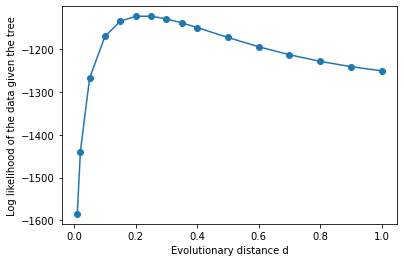

In [57]:
plt.plot(ds,lls,marker='o')
ax = plt.gca()
ax.set_xlabel("Evolutionary distance d")
ax.set_ylabel("Log likelihood of the data given the tree")
plt.show()

We observe that a maximum of the likelihood is obtained for d close to 0.2 to 0.25. This is the maximum likelihood estimate of d here. It corresponds to the value we took above. In tree A, we have $d_{01}=2d$, and we saw in question c) that $d_{01}=0.44$, so this is consistent.